In [133]:
%matplotlib inline
%reset
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import matplotlib.patches as patches
from matplotlib.ticker import FormatStrFormatter
from matplotlib import pyplot as plt, animation
from math import sqrt, pi, cos

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Files and paths

In [134]:
path = "E:\\OceanParcels"
final_path = path + "\\data\\processed\\final grids\\final_" # final grids
fig_path = path + "\\outputs\\figures\\"
coords = path + "\\data\\processed\\coordinates.nc"
sc_path = path + "\\data\\processed\\scenario data\\"

scenario = np.array(["S0", "S1", "S2", "S3", "S4", "S5", "S6"])
mon_2 = np.array(["may", "jun", "jul", "aug", "sep", "oct"])

## Basic stuff

In [135]:
dsc = xr.open_dataset(coords, decode_times = False).load()
dsc.close()

botz = dsc.botz.values*-1
longitudes = dsc.lon_grid.values[0,:]
latitudes = dsc.lat_grid.values[:,0]

del dsc

## Hydro data

Loads up all the data previously generated and saved.

In [140]:
# Choose
sc = 6
mo = 1

runname = mon_2[mo] + "_" + scenario[sc]
ds1name = final_path + runname + "_1.nc"
print(ds1name)

# ds1 contains the data
ds1 = xr.open_dataset(ds1name, decode_times = False).load()
ds1.close()

tt = sum(np.shape(ds1.times_secs.values))

U_mod = ds1.U_atten.values
V_mod = ds1.V_atten.values
W = ds1.W.values

longitudes = longitudes[:41]
latitudes = latitudes[:40]

maxUVW = 0.8
minUVW = 0.0

E:\OceanParcels\data\processed\final grids\final_may_S6_1.nc


# Some pretty plots

These are just to get a look at what the flow fields look like.

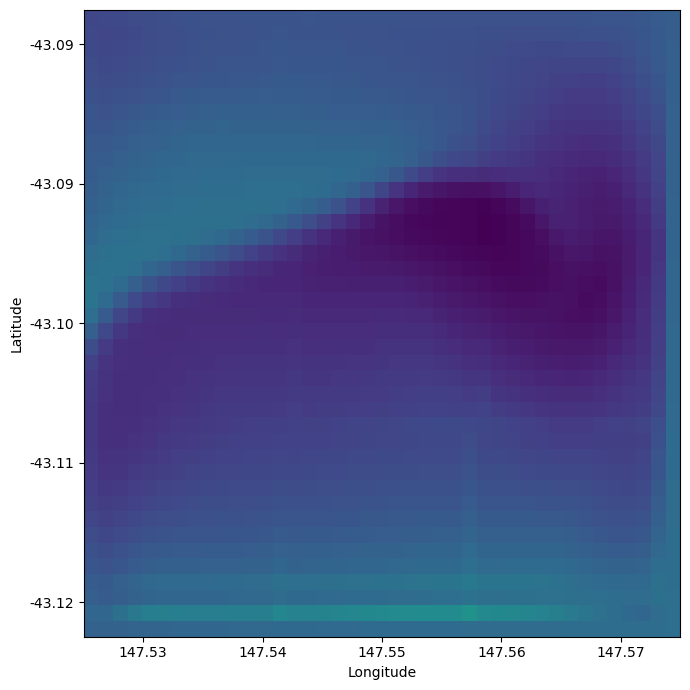

In [147]:
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True

slice_U = np.squeeze(U_mod[:,7,0:40,0:41])
slice_V = np.squeeze(V_mod[:,7,0:40,0:41])
slice_W = np.squeeze(W[:,7,0:40,0:41])
canopy_UVW = np.sqrt(np.power(slice_U,2)+np.power(slice_V,2)+np.power(slice_W,2))

# Set up plotting
fig = plt.figure()
ax = plt.axes() 
# Animation function
def animate(i): 
    z = canopy_UVW[i,:,:]
    col = plt.pcolormesh(longitudes, latitudes, z, vmin = minUVW, vmax = maxUVW)
    return col

anim = matplotlib.animation.FuncAnimation(fig, animate, interval=10, frames = int(round(tt/10)))
# All the formatting
ax.set_yticks((np.linspace(yticks[0]+0.002, yticks[1]-0.002, 5)))
ax.set_xticks((np.linspace(xticks[0]+0.005, xticks[1]-0.005, 5)))
ax.set_xticks((np.linspace(xticks[0]+0.005, xticks[1]-0.005, 5)))
ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(fmt))
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(fmt))
ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(fmt))
ax.set_ylabel("Latitude")
ax.set_xlabel("Longitude")
ax.set_xlabel("Longitude")
#plt.colorbar(col, label = "Relative attenuation")

anim.save(fig_path + "canopy_UVW_" + runname + ".gif")